In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from datetime import datetime
import logging
import math



# NOMBRE D'ANNEES RECENTES A IMPORTER (N DERNIERES ANNEES)
N_YEARS = 3  # pour le modele ML


df = pd.read_parquet("z:\data\cl_estim\cleaned_data\df_transac_clean.parquet")

In [2]:
df

CD_OP CD_NATUR_OP  MT_ENCOURS CD_STATUT  NB_SURF_HAB  \
0         M250801597         AQA         0.0       APF         61.0   
1         M250803446         AQA         0.0       APF          NaN   
2         M250803701         AQA         0.0       APF        101.0   
3         M250800248         AQA         0.0       APF          NaN   
4         M250804487         AQA         0.0       APF          NaN   
...              ...         ...         ...       ...          ...   
11152014  M220141473         ACO         NaN      None          NaN   
11152015  M230415481         AQA         NaN      None          NaN   
11152016  M230414333         AQA         NaN      None          NaN   
11152017  M240422160         AQA         NaN      None          NaN   
11152018  M241009352         AQA         NaN      None          NaN   

          NB_SURF_CREE  NB_PIECES  NB_SURF_TER    MT_VAL  VALEUR_FONCIERE  \
0                  NaN        3.0        352.0       0.0         100000.0   
1                  NaN        NaN          NaN       0.0         339000.0   
2                  NaN        NaN          NaN  300000.0         300000.0   
3                  NaN        NaN          NaN       0.0         151000.0   
4                  NaN        NaN          NaN       0.0         399000.0   
...                ...        ...          ...       ...              ...   
11152014           NaN        NaN          NaN       NaN         248000.0   
11152015           NaN        NaN          NaN       NaN         250000.0   
11152016           NaN        NaN          NaN       NaN          90000.0   
11152017           NaN        NaN          NaN       NaN         193000.0   
11152018           NaN        NaN          NaN       NaN         240000.0   

          ...  MAX_surface_reelle_bati_unique  NOMBRE_LOTS  nb_PARCELLES  \
0         ...                             NaN          NaN           NaN   
1         ...                             NaN          NaN           NaN   
2         ...                             NaN          NaN           NaN   
3         ...                             NaN          NaN           NaN   
4         ...                             NaN          NaN           NaN   
...       ...                             ...          ...           ...   
11152014  ...                             NaN          NaN           NaN   
11152015  ...                             NaN          NaN           NaN   
11152016  ...                             NaN          NaN           NaN   
11152017  ...                             NaN          NaN           NaN   
11152018  ...                             NaN          NaN           NaN   

         Habitation_unique Dependance_unique  Terrain_unique  \
0                      NaN               NaN             NaN   
1                      NaN               NaN             NaN   
2                      NaN               NaN             NaN   
3                      NaN               NaN             NaN   
4                      NaN               NaN             NaN   
...                    ...               ...             ...   
11152014               NaN               NaN             NaN   
11152015               NaN               NaN             NaN   
11152016               NaN               NaN             NaN   
11152017               NaN               NaN             NaN   
11152018               NaN               NaN             NaN   

          nb_TYPE_LOCAL_Maison nb_TYPE_LOCAL_Appartement  \
0                          NaN                       NaN   
1                          NaN                       NaN   
2                          NaN                       NaN   
3                          NaN                       NaN   
4                          NaN                       NaN   
...                        ...                       ...   
11152014                   NaN                       NaN   
11152015                   NaN                       NaN   
11152016       

Importation des classes de détection d'anomalies de CL_ESTIM

In [3]:
from datetime import timedelta, datetime
from dateutil.relativedelta import relativedelta
from prez.classe import (DateOffset,
                         ImportRecentData,
                         CalcMetaNum,
                         EffectifsParMailleGeo,
                         DefMailleGeoCITY,
                         DetectAno,
                         detect_ano_ml

)
import numpy as np


Fonction detect_ano_ml

In [4]:
base_ml = detect_ano_ml(input_df=df, date_min = "2022-08-01", date_max = None, type_bien = "APT")

n:\uflumth\indicateur_marche\prix_m2\my_cl_estim\prez\classe.py:256: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[0] is not None:
n:\uflumth\indicateur_marche\prix_m2\my_cl_estim\prez\classe.py:258: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (str(x[0])[:3] not in ["750", "690"]) and (
n:\uflumth\indicateur_marche\prix_m2\my_cl_estim\prez\classe.py:268: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return x[0], "ARR"
n:\u

In [5]:
print(base_ml)

             CD_OP     ville_ TYPE_BIEN       DATE  YEAR       Prix_m2
0       M250808382      PARIS       APT 2025-09-01  2025  13670.885742
1       M250726639       LYON       APT 2025-09-01  2025   4814.814941
2       M250808014     NANTES       APT 2025-09-01  2025   3047.619141
3       M250806529  MARTIGUES       APT 2025-09-01  2025   4058.441650
4       M250805802      PARIS       APT 2025-09-01  2025  12619.047852
...            ...        ...       ...        ...   ...           ...
400730        None      BREST       APT 2022-08-01  2022   2051.724138
400731        None       NICE       APT 2022-08-01  2022   7078.571429
400732        None      PARIS       APT 2022-08-01  2022  10000.000000
400733        None       NICE       APT 2022-08-01  2022   2767.441860
400734        None   POITIERS       APT 2022-08-01  2022   2703.125000

[400735 rows x 6 columns]


In [6]:
print(base_ml.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400735 entries, 0 to 400734
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   CD_OP      109354 non-null  object        
 1   ville_     400735 non-null  object        
 2   TYPE_BIEN  400735 non-null  object        
 3   DATE       400735 non-null  datetime64[ns]
 4   YEAR       400735 non-null  int64         
 5   Prix_m2    390344 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 18.3+ MB
None


Notre but ici est de pouvoir calculer l'évolutin des prix au m2 des appartements sur un an. LPI-IAD se base sur une méthode de moyenne glissante sur 12 mois: on prend la moyenne des prix au m2 des 12 derniers mois  au mois actuel, puis on prend la moyenne des prix au m2 des 12 derniers mois au même mois de l'année dernière et on calcul l'évolution.

In [7]:
df_prix_na = base_ml["Prix_m2"].isna().sum()
print(f"{df_prix_na} données manquantes")
 

10391 données manquantes


On regroupe par ville et par mois

In [8]:
base_ml = base_ml.groupby(["ville_", "DATE"])["Prix_m2"].agg([
    ("Prix_m2_moyen", "mean"),
    ("Q1", lambda x: x.quantile(0.25)),
    ("Median", "median"),
    ("Q3", lambda x: x.quantile(0.75))
]).reset_index()
base_ml

ville_       DATE  Prix_m2_moyen           Q1       Median  \
0          ALBI 2022-08-01    2419.964295  1890.243902  2419.354839   
1          ALBI 2022-09-01    2571.928973  1978.125000  2266.190476   
2          ALBI 2022-10-01    2534.970875  2115.333333  2505.967604   
3          ALBI 2022-11-01    2496.268209  2054.421769  2407.407407   
4          ALBI 2022-12-01    2588.507390  2111.111111  2500.000000   
...         ...        ...            ...          ...          ...   
4207  WATTRELOS 2025-02-01    1884.821429  1820.982143  1884.821429   
4208  WATTRELOS 2025-03-01    2533.333333  2533.333333  2533.333333   
4209  WATTRELOS 2025-04-01    1434.426230  1434.426230  1434.426230   
4210  WATTRELOS 2025-05-01            NaN          NaN          NaN   
4211  WATTRELOS 2025-06-01    2236.918605  2042.877907  2236.918605   

               Q3  
0     2761.111111  
1     2890.185322  
2     2664.062500  
3     2869.208838  
4     3043.478261  
...           ...  
4207  1948.660714  
4208  2533.333333  
4209  1434.426230  
4210          NaN  
4211  2430.959302  

[4212 rows x 6 columns]

Répartition des NA

In [9]:
na_par_ville = base_ml.groupby("ville_")["Prix_m2_moyen"].apply(lambda x: x.isna().mean()*100)

na_counts = na_par_ville.round(1).value_counts().sort_index()

print("Répartition des pourcentages de NA :")
print(na_counts)

na_counts_nozero = na_counts[na_counts.index > 0]

Répartition des pourcentages de NA :
Prix_m2_moyen
0.0    96
2.6     1
2.7     6
2.8     8
2.9     1
5.4     1
5.6     2
5.7     1
5.9     1
Name: count, dtype: int64


Nombre de villes par catégorie :
0%       96
0-10%    21
Name: count, dtype: int64


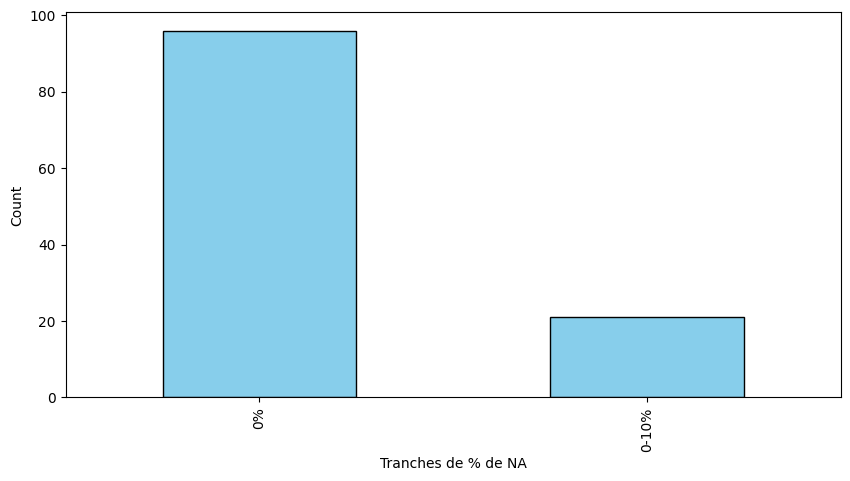

In [10]:

na_par_ville = base_ml.groupby("ville_")["Prix_m2_moyen"].apply(lambda x: x.isna().mean()*100)


categories = pd.Series(index=na_par_ville.index, dtype="object")


categories[na_par_ville == 0] = "0%"
categories[na_par_ville == 100] = "100%"


bins = [0, 10, 30, 50, 85, 100]
labels = ["0-10%", "10-30%", "30-50%", "50-85%", "85-100%"]

mask = categories.isna()
categories[mask] = pd.cut(na_par_ville[mask], bins=bins, labels=labels, include_lowest=True, right=False)

counts = categories.value_counts().sort_index()
counts = counts
print("Nombre de villes par catégorie :")
print(counts)

ax = counts.plot(kind="bar", figsize=(10,5), color="skyblue", edgecolor="k")
ax.set_xlabel("Tranches de % de NA")
ax.set_ylabel("Count")
plt.show()

On remarque que la grande majorité des villes n'ont pas de valeurs manquantes. Puis on remarque qu'un grand nombre de villes possède moins de 10% de valeurs manquantes

In [11]:
na_par_annee = (base_ml.assign(annee = base_ml["DATE"].dt.year).groupby("annee")["Prix_m2_moyen"].apply(lambda x: x.isna().mean()*100).sort_index())
print(na_par_annee)

annee
2022    0.000000
2023    0.071225
2024    0.071276
2025    2.926829
Name: Prix_m2_moyen, dtype: float64


In [12]:
resultats = []

base_ml["moyenne_glissante_12m"] = (
    base_ml.groupby("ville_")["Prix_m2_moyen"]
    .rolling(window=12, min_periods=12)
    .mean()
    .reset_index(level=0, drop=True)
)

for ville, groupe in base_ml.groupby("ville_"):
    groupe = groupe.sort_values("DATE")

    # Dernière valeur connue pour Prix_m2
    last_idx = groupe["Prix_m2_moyen"].last_valid_index()
    if last_idx is None:
        continue  
    last_row = groupe.loc[last_idx]
    date_last = last_row["DATE"]
    prix_last = last_row["Prix_m2_moyen"]

    # Dernière valeur connue pour la moyenne glissante
    moyenne_last_idx = groupe["moyenne_glissante_12m"].last_valid_index()
    moyenne_last = groupe.loc[moyenne_last_idx, "moyenne_glissante_12m"]

    # Calcul de la date de référence pour l'année précédente
    date_previous = date_last - pd.DateOffset(years=1)
    groupe_previous = groupe[groupe["DATE"] <= date_previous]

    if not groupe_previous.empty:
        prev_idx = groupe_previous["moyenne_glissante_12m"].last_valid_index()
        if prev_idx is not None:
            moyenne_previous = groupe_previous.loc[prev_idx, "moyenne_glissante_12m"]
            evolution = ((moyenne_last - moyenne_previous) / moyenne_previous) * 100
        else:
            evolution = None
    else:
        evolution = None

    resultats.append({
        "Ville": ville,
        "Derniere date valide": date_last.date(),
        "Evolution (%)": round(evolution, 2) if evolution is not None else None,
        "Prix_m2_moyen": prix_last
    })


rdf = pd.DataFrame(resultats)
rdf

Ville Derniere date valide  Evolution (%)  Prix_m2_moyen
0            ALBI           2025-06-01           9.83    3475.000000
1            ALES           2025-06-01           0.26    1677.156177
2     ALFORTVILLE           2025-07-01          -4.21    5661.550257
3          AMIENS           2025-09-01           1.20    1512.820557
4          ANGERS           2025-07-01           7.61    4075.414902
..            ...                  ...            ...            ...
112    VERSAILLES           2025-07-01          -1.40    6975.298768
113     VILLEJUIF           2025-07-01           4.56    5336.415551
114  VILLEURBANNE           2025-07-01           1.94    3999.032324
115     VINCENNES           2025-07-01           3.27   11426.829102
116     WATTRELOS           2025-06-01          -4.28    2236.918605

[117 rows x 4 columns]

In [13]:
rdf_date_min = rdf["Derniere date valide"].min()
print(rdf_date_min)


2025-05-01


# Comparaison avec LPI-IAD

L'utilisation de notre méthode ci-dessus implique la base de mois de mai 2025 comme date minimum commune entre toutes les villes. On pourra éventuellement se concentrer sur le top 15 villes plus tard.
On compare alors les données de mai 2025 CL vs LPI-IAD

In [14]:
base_ml2 = detect_ano_ml(input_df=df, date_min = "2022-08-01", date_max = "2025-06-01", type_bien = "APT")

n:\uflumth\indicateur_marche\prix_m2\my_cl_estim\prez\classe.py:256: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if x[0] is not None:
n:\uflumth\indicateur_marche\prix_m2\my_cl_estim\prez\classe.py:258: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (str(x[0])[:3] not in ["750", "690"]) and (
n:\uflumth\indicateur_marche\prix_m2\my_cl_estim\prez\classe.py:259: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  str(x[0]) not in marsei

In [15]:
base_ml2 = base_ml2.rename(columns={"ville_":"Ville"})
print(base_ml2)

             CD_OP     Ville TYPE_BIEN       DATE  YEAR       Prix_m2
0       M250420078    PANTIN       APT 2025-05-01  2025   6893.939394
1       M250218419    TARBES       APT 2025-05-01  2025   3784.210526
2       M250332350  TOULOUSE       APT 2025-05-01  2025   3630.434783
3       M250431223     NANCY       APT 2025-05-01  2025   2422.222222
4       M250506495    CLICHY       APT 2025-05-01  2025   7105.263158
...            ...       ...       ...        ...   ...           ...
396540        None     BREST       APT 2022-08-01  2022   2051.724138
396541        None      NICE       APT 2022-08-01  2022   7078.571429
396542        None     PARIS       APT 2022-08-01  2022  10000.000000
396543        None      NICE       APT 2022-08-01  2022   2767.441860
396544        None  POITIERS       APT 2022-08-01  2022   2703.125000

[396545 rows x 6 columns]


In [17]:
df_prix_na = base_ml2["Prix_m2"].isna().sum()
print(f"{df_prix_na} données manquantes")

9616 données manquantes


In [18]:
base_ml2 = base_ml2.groupby(["Ville", "DATE"])["Prix_m2"].agg([
    ("Prix_m2_moyen", "mean"),
    ("Q1", lambda x: x.quantile(0.25)),
    ("Median", "median"),
    ("Q3", lambda x: x.quantile(0.75))
]).reset_index()
base_ml2

Ville       DATE  Prix_m2_moyen           Q1       Median  \
0          ALBI 2022-08-01    2419.964295  1890.243902  2419.354839   
1          ALBI 2022-09-01    2571.928973  1978.125000  2266.190476   
2          ALBI 2022-10-01    2534.970875  2115.333333  2505.967604   
3          ALBI 2022-11-01    2496.268209  2054.421769  2407.407407   
4          ALBI 2022-12-01    2588.507390  2111.111111  2500.000000   
...         ...        ...            ...          ...          ...   
3969  WATTRELOS 2025-01-01            NaN          NaN          NaN   
3970  WATTRELOS 2025-02-01    1884.821429  1820.982143  1884.821429   
3971  WATTRELOS 2025-03-01    2533.333333  2533.333333  2533.333333   
3972  WATTRELOS 2025-04-01    1434.426230  1434.426230  1434.426230   
3973  WATTRELOS 2025-05-01            NaN          NaN          NaN   

               Q3  
0     2761.111111  
1     2890.185322  
2     2664.062500  
3     2869.208838  
4     3043.478261  
...           ...  
3969          NaN  
3970  1948.660714  
3971  2533.333333  
3972  1434.426230  
3973          NaN  

[3974 rows x 6 columns]

In [19]:
na_par_ville = base_ml2.groupby("Ville")["Prix_m2_moyen"].apply(lambda x: x.isna().mean()*100)

na_counts = na_par_ville.round(1).value_counts().sort_index()

print("Répartition des pourcentages de NA :")
print(na_counts)

na_counts_nozero = na_counts[na_counts.index > 0]

Répartition des pourcentages de NA :
Prix_m2_moyen
0.0    109
2.9      7
6.1      1
Name: count, dtype: int64


Nombre de villes par catégorie :
0%       109
0-10%      8
Name: count, dtype: int64


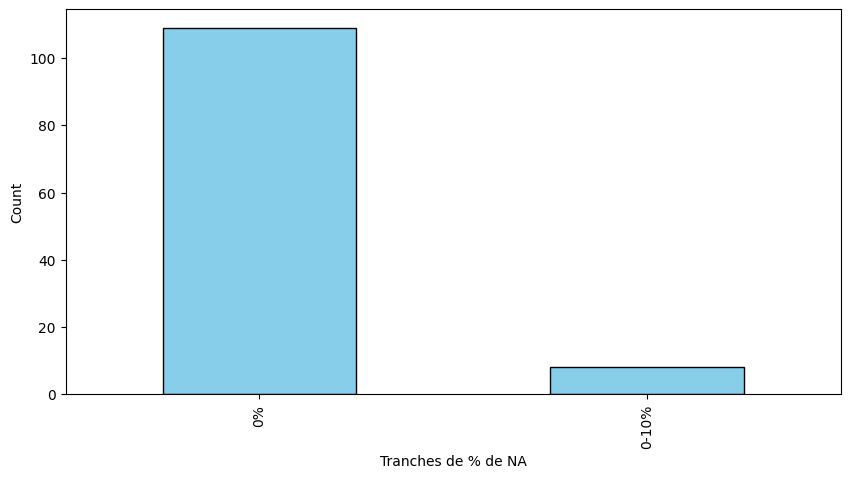

In [20]:
na_par_ville = base_ml2.groupby("Ville")["Prix_m2_moyen"].apply(lambda x: x.isna().mean()*100)


categories = pd.Series(index=na_par_ville.index, dtype="object")

categories[na_par_ville == 0] = "0%"
categories[na_par_ville == 100] = "100%"


bins = [0, 10, 30, 50, 85, 100]
labels = ["0-10%", "10-30%", "30-50%", "50-85%", "85-100%"]

mask = categories.isna()
categories[mask] = pd.cut(na_par_ville[mask], bins=bins, labels=labels, include_lowest=True, right=False)

counts = categories.value_counts().sort_index()
counts = counts
print("Nombre de villes par catégorie :")
print(counts)

ax = counts.plot(kind="bar", figsize=(10,5), color="skyblue", edgecolor="k")
ax.set_xlabel("Tranches de % de NA")
ax.set_ylabel("Count")
plt.show()

In [21]:
na_par_annee = (base_ml.assign(annee = base_ml["DATE"].dt.year).groupby("annee")["Prix_m2_moyen"].apply(lambda x: x.isna().mean()*100).sort_index())
print(na_par_annee)

annee
2022    0.000000
2023    0.071225
2024    0.071276
2025    2.926829
Name: Prix_m2_moyen, dtype: float64


In [24]:
resultats = []

base_ml2["moyenne_glissante_12m"] = (
    base_ml2.groupby("Ville")["Prix_m2_moyen"]
    .rolling(window=12, min_periods=12)
    .mean()
    .reset_index(level=0, drop=True)
)

for ville, groupe in base_ml2.groupby("Ville"):
    groupe = groupe.sort_values("DATE")

    # Dernière valeur connue pour Prix_m2
    last_idx = groupe["Prix_m2_moyen"].last_valid_index()
    if last_idx is None:
        continue  
    last_row = groupe.loc[last_idx]
    date_last = last_row["DATE"]
    prix_last = last_row["Prix_m2_moyen"]
    Q1_last = last_row["Q1"]
    median_last = last_row["Median"]
    Q3_last = last_row["Q3"]

    # Dernière valeur connue pour la moyenne glissante
    moyenne_last_idx = groupe["moyenne_glissante_12m"].last_valid_index()
    moyenne_last = groupe.loc[moyenne_last_idx, "moyenne_glissante_12m"]

    # Calcul de la date de référence pour l'année précédente
    date_previous = date_last - pd.DateOffset(years=1)
    groupe_previous = groupe[groupe["DATE"] <= date_previous]

    if not groupe_previous.empty:
        prev_idx = groupe_previous["moyenne_glissante_12m"].last_valid_index()
        if prev_idx is not None:
            moyenne_previous = groupe_previous.loc[prev_idx, "moyenne_glissante_12m"]
            evolution = ((moyenne_last - moyenne_previous) / moyenne_previous) * 100
        else:
            evolution = None
    else:
        evolution = None

    resultats.append({
        "Ville": ville,
        "Derniere date valide": date_last.date(),
        "Evolution en % - CL": round(evolution, 2) if evolution is not None else None,
        "Prix moyen du m2 - CL": prix_last,
        "Prix du m2 (Q1) - CL" : Q1_last ,
        "Prix du m2 (médian) - CL" : median_last,
        "Prix du m2 (Q3) - CL" : Q3_last
    })


rdf = pd.DataFrame(resultats)
rdf["Derniere date valide"] = pd.to_datetime(rdf["Derniere date valide"])
rdf

Ville Derniere date valide  Evolution en % - CL  \
0            ALBI           2025-05-01                 7.12   
1            ALES           2025-04-01                 0.53   
2     ALFORTVILLE           2025-05-01                -7.03   
3          AMIENS           2025-05-01                 0.62   
4          ANGERS           2025-05-01                 4.12   
..            ...                  ...                  ...   
112    VERSAILLES           2025-05-01                -2.32   
113     VILLEJUIF           2025-05-01                 1.57   
114  VILLEURBANNE           2025-05-01                -1.59   
115     VINCENNES           2025-05-01                 0.15   
116     WATTRELOS           2025-04-01                -4.29   

     Prix moyen du m2 - CL  Prix du m2 (Q1) - CL  Prix du m2 (médian) - CL  \
0              2644.388157           2000.000000               2202.898551   
1              2113.016823           1577.898967               2208.022388   
2              4370.062363           3773.979592               4609.354414   
3              2980.856906           2637.867647               2845.454545   
4              3915.780046           2962.147887               3883.315981   
..                     ...                   ...                       ...   
112            6568.538962           5512.820513               6633.333333   
113            5179.401185           3828.242945               4912.347561   
114            3894.729540           3234.544695               3943.905263   
115            8669.202017           7589.285714               8161.538462   
116            1434.426230           1434.426230               1434.426230   

     Prix du m2 (Q3) - CL  
0             3566.666667  
1             2743.140244  
2             5064.535769  
3             3469.230769  
4             4847.416667  
..                    ...  
112           7600.000000  
113           6142.248377  
114           4594.029851  
115           9515.151515  
116           1434.426230  

[117 rows x 7 columns]

In [25]:
lpiiad = pd.read_excel(rf"N:\uflumth\indicateur_marche\prix_m2\LPI-IAD data.xlsx", sheet_name = "Feuille 2")

lpiiad.rename(columns={"Tableau 1":"Derniere date valide", "Unnamed: 1" : "Region",
                        "Unnamed: 2": "Departement", "Unnamed: 3" : "Ville", "Unnamed: 4" : "Prix du m2 - LPI/IAD",
                        "Unnamed: 5": "Evolution en % - LPI/IAD"}, inplace = True)
lpiiad = lpiiad.drop(lpiiad.index[0:2])
lpiiad.reset_index(drop = True, inplace = True)
lpiiad["Derniere date valide"] = pd.to_datetime(lpiiad["Derniere date valide"])
lpiiad

Derniere date valide            Region Departement                Ville  \
0              2025-08-01            Alsace    BAS-RHIN           STRASBOURG   
1              2025-08-01            Alsace   HAUT-RHIN               COLMAR   
2              2025-08-01            Alsace   HAUT-RHIN             MULHOUSE   
3              2025-08-01         Aquitaine     GIRONDE             BORDEAUX   
4              2025-08-01         Aquitaine     GIRONDE             MÉRIGNAC   
...                   ...               ...         ...                  ...   
1783           2023-06-01  Pays de la Loire      SARTHE              LE MANS   
1784           2023-06-01  Pays de la Loire      VENDÉE     LA ROCHE-SUR-YON   
1785           2023-06-01  Pays de la Loire      VENDÉE  LES SABLES-D'OLONNE   
1786           2023-06-01          Picardie       AISNE        SAINT-QUENTIN   
1787           2023-06-01          Picardie        OISE            COMPIÈGNE   

     Prix du m2 - LPI/IAD Evolution en % - LPI/IAD  
0                    4016                     -2.2  
1                    2970                     15.5  
2                    1677                      5.2  
3                    4312                     -0.5  
4                    3391                      0.4  
...                   ...                      ...  
1783                 2481                      8.6  
1784                 2796                      9.0  
1785                 5631                      6.8  
1786                 1592                     13.2  
1787                 2624                      1.4  

[1788 rows x 6 columns]

In [26]:
merge = pd.merge(left = lpiiad, right = rdf, on = ['Ville',"Derniere date valide"])
merge["Prix du m2 - LPI/IAD"] = pd.to_numeric(merge["Prix du m2 - LPI/IAD"])
merge["Evolution en % - LPI/IAD"] = pd.to_numeric(merge["Evolution en % - LPI/IAD"])
merge

Derniere date valide       Region   Departement         Ville  \
0             2025-05-01       Alsace      BAS-RHIN    STRASBOURG   
1             2025-05-01       Alsace     HAUT-RHIN        COLMAR   
2             2025-05-01       Alsace     HAUT-RHIN      MULHOUSE   
3             2025-05-01    Aquitaine       GIRONDE      BORDEAUX   
4             2025-05-01    Aquitaine       GIRONDE        PESSAC   
..                   ...          ...           ...           ...   
103           2025-05-01  Rhône-Alpes         RHONE          BRON   
104           2025-05-01  Rhône-Alpes         RHONE          LYON   
105           2025-05-01  Rhône-Alpes         RHONE  VILLEURBANNE   
106           2025-05-01  Rhône-Alpes  HAUTE-SAVOIE        ANNECY   
107           2025-05-01  Rhône-Alpes        SAVOIE      CHAMBERY   

     Prix du m2 - LPI/IAD  Evolution en % - LPI/IAD  Evolution en % - CL  \
0                    4094                      -1.1                -3.07   
1                    3147                      18.1                 8.18   
2                    1662                       3.9               -22.73   
3                    4368                      -2.7                -2.72   
4                    3668                      -5.3                 5.43   
..                    ...                       ...                  ...   
103                  3151                      -2.6                 4.83   
104                  4584                      -1.9                -2.94   
105                  3790                      -2.0                -1.59   
106                  5631                       5.7                 2.77   
107                  3192                       0.9                 7.32   

     Prix moyen du m2 - CL  Prix du m2 (Q1) - CL  Prix du m2 (médian) - CL  \
0              3550.286239           2558.139535               3374.736842   
1              2661.916157           2271.551724               2684.103448   
2              1564.907527           1496.875000               1642.857143   
3              4681.819126           3948.717949               4625.000000   
4              3847.612986           3650.125000               3894.000000   
..                     ...                   ...                       ...   
103            3583.012071           2767.057903               3000.000000   
104            4665.862254           3927.038250               4563.858696   
105            3894.729540           3234.544695               3943.905263   
106            4961.957569           4148.827299               4931.834187   
107            3645.511294           2625.252525               4111.111111   

     Prix du m2 (Q3) - CL  
0             4376.344086  
1             3013.681818  
2             1980.000000  
3             5571.973684  
4             4096.153846  
..                    ...  
103           4350.322581  
104           5261.282468  
105           4594.029851  
106           5828.618421  
107           4195.652174  

[108 rows x 11 columns]

In [27]:
print(merge[["Prix du m2 - LPI/IAD","Prix moyen du m2 - CL", "Prix du m2 (médian) - CL"]].describe())

       Prix du m2 - LPI/IAD  Prix moyen du m2 - CL  Prix du m2 (médian) - CL
count            108.000000             108.000000                108.000000
mean            3558.157407            3694.279300               3640.888871
std             1679.568292            1652.184264               1668.315598
min             1234.000000            1429.564964               1220.058294
25%             2438.500000            2462.540137               2470.454545
50%             3064.500000            3462.390212               3349.649123
75%             4189.250000            4669.851472               4575.232625
max            10423.000000            9920.063126               9633.971292


In [28]:
print(merge[["Evolution en % - LPI/IAD","Evolution en % - CL"]].describe())

       Evolution en % - LPI/IAD  Evolution en % - CL
count                108.000000           108.000000
mean                   2.370370             2.359444
std                    6.424402             6.585318
min                   -8.200000           -22.730000
25%                   -1.425000            -1.800000
50%                    1.000000             1.730000
75%                    5.175000             6.237500
max                   23.600000            26.800000


### Corrélation

In [29]:
corr_prix = merge["Prix du m2 - LPI/IAD"].corr(merge["Prix moyen du m2 - CL"])
corr_evol = merge["Evolution en % - LPI/IAD"].corr(merge["Evolution en % - CL"])
print("Corrélation prix du m2", corr_prix)
print("Corrélation évolution anuelle", corr_evol)

Corrélation prix du m2 0.9429351033570663
Corrélation évolution anuelle 0.35280752615200595


### Distribution des écarts

In [30]:
merge["diff_prix"] = merge["Prix du m2 - LPI/IAD"] - merge["Prix moyen du m2 - CL"]
merge["diff_evol"] = merge["Evolution en % - LPI/IAD"] - merge["Evolution en % - CL"]

print(merge[["diff_prix","diff_evol"]].describe())

         diff_prix   diff_evol
count   108.000000  108.000000
mean   -136.121893    0.010926
std     563.431517    7.401830
min   -3369.260870  -18.570000
25%    -414.195577   -4.240000
50%    -130.851094   -0.070000
75%     144.729550    3.417500
max    1393.489713   30.230000


In [31]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(merge["Prix du m2 - LPI/IAD"], merge["Prix moyen du m2 - CL"])
print(f"Pente = {slope:.3f}, Intercept = {intercept:.2f}, R2 {r_value**2:.3f}")

Pente = 0.928, Intercept = 393.87, R2 0.889


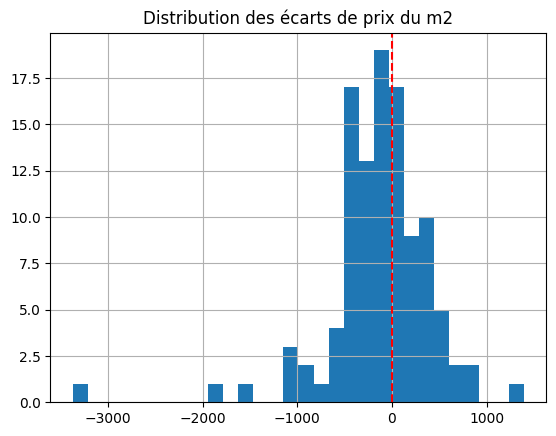

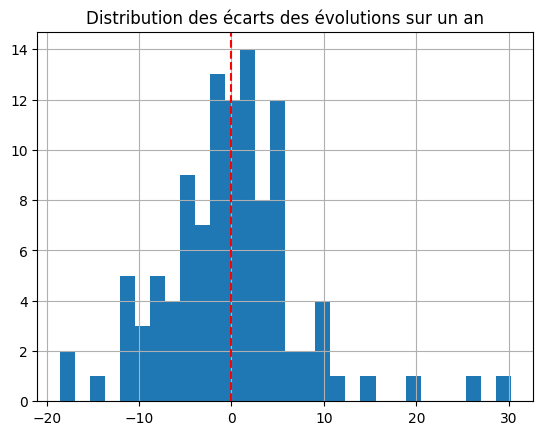

In [32]:
merge["diff_prix"].hist(bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution des écarts de prix du m2')
plt.show()

merge["diff_evol"].hist(bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribution des écarts des évolutions sur un an')
plt.show()

Distribution ~ normale des écarts de prix et d'évolution => les différence sont globalement stables et aléatoires autour de 0

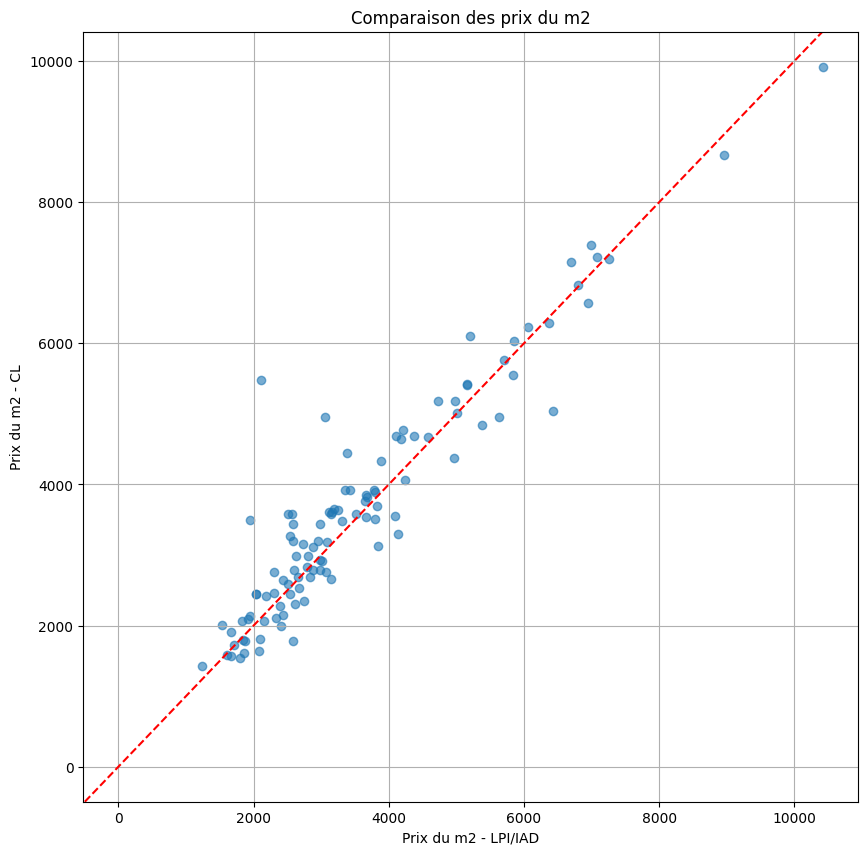

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(merge["Prix du m2 - LPI/IAD"], merge["Prix moyen du m2 - CL"], alpha= 0.6)
plt.axline((0,0), slope = 1, color = "red", linestyle = "--")
plt.xlabel("Prix du m2 - LPI/IAD")
plt.ylabel("Prix du m2 - CL")
plt.title("Comparaison des prix du m2")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(merge["Evolution en % - LPI/IAD"], merge["Evolution en % - CL"], alpha= 0.6)
plt.axline((0,0), slope = 1, color = "red", linestyle = "--")
plt.xlabel("Evolution en % - LPI/IAD")
plt.ylabel("Evolution en % - CL")
plt.title("Comparaison des évolutions annuelles")
plt.grid(True)
plt.show()

Les sources évoluent de manière cohérente

### Test statistique

Test de comparaison de Pearson: on calcule la stat de t-test sur 2 échantillons. H0: Les deux échantillons ont des moyennes théoriques identiques

In [34]:
from scipy.stats import ttest_rel

stat, pval = ttest_rel(merge["Evolution en % - LPI/IAD"], merge["Evolution en % - CL"])
print("p-value :", pval)

p-value : 0.98778933842367


In [35]:
stat, pval = ttest_rel(merge["Prix du m2 - LPI/IAD"], merge["Prix moyen du m2 - CL"])
print("p-value :", pval)

p-value : 0.013544160877069318


* Pour l'évolution en % : p-value >> 0.05 => on ne rejette pas H0, donc les données disponibles ne permettent pas de détecter une différence statistiquement significative 
* Pour le prix du m2 : p-value < 0.05 => on rejette H0: on observe une différence statistiquement significative


Cela implique donc qu'en moyenne, les taux d'évolutions sur un an au mois de mai des deux sources sont globalement similaires. Cependant, on observera une différence significative dans les niveaux de prix (lié aux différences méthodologiques, périmètres...)